# 2.1 Images

In [23]:
%cd /content/drive/MyDrive/PhD/courses/ME592/Assignments/hw1

/content/drive/MyDrive/PhD/courses/ME592/Assignments/hw1


In [24]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(423, 419, 3)


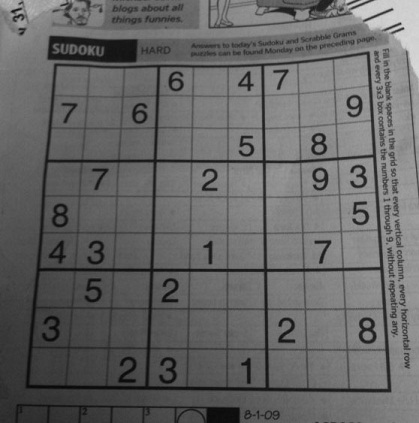

In [25]:
img = cv2.imread('sudoku-original.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
cv2_imshow(gray)

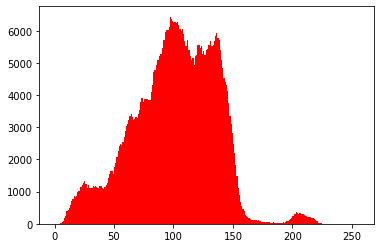

In [26]:
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

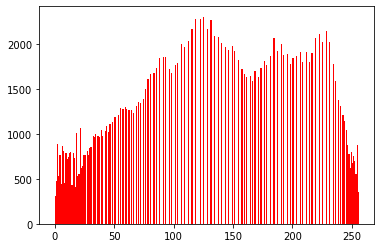

In [27]:
equ = cv2.equalizeHist(gray)
_ = plt.hist(equ.flatten(),256,[0,256], color = 'r')

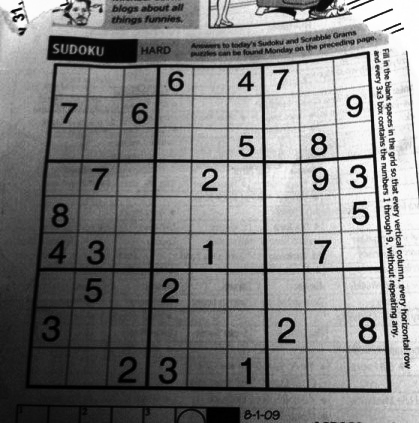

In [28]:
cv2_imshow(equ)

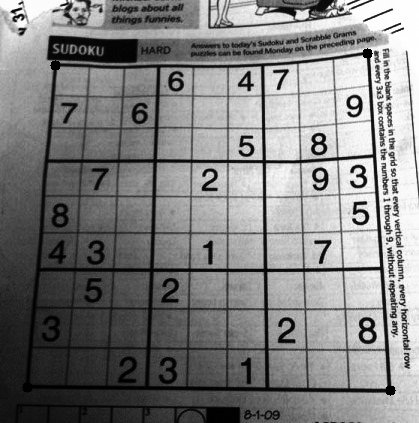

In [29]:
equ_circle = cv2.circle(equ, (55, 65), 5, (0, 0, 0), -1)
equ_circle = cv2.circle(equ, (367, 53), 5, (0, 0, 0), -1)
equ_circle = cv2.circle(equ, (27, 387), 5, (0, 0, 0), -1)
equ_circle = cv2.circle(equ, (390, 390), 5, (0, 0, 0), -1)
pts1 = np.float32([[55, 65], [367, 53], [27, 387], [390, 390]])

cv2_imshow(equ_circle)

In [30]:
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

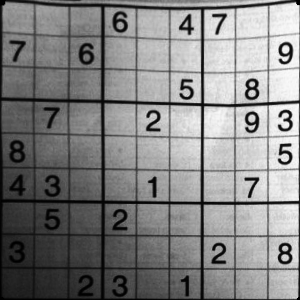

In [31]:
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(equ, matrix, (300, 300))
cv2_imshow(result)

# 2.2 Time Series

In [32]:
time_data = pd.read_csv('energydata_complete.csv')
time_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,1/11/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433
1,1/11/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195
2,1/11/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668
3,1/11/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390
4,1/11/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,5/27/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812
19731,5/27/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940
19732,5/27/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117
19733,5/27/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784


# 2.2.1

In [35]:
timedata_np = time_data.to_numpy()
print(timedata_np.shape)

(19735, 28)


whole data

[13.27543316 18.60619498 28.64266817 ... 29.19911708 6.322783651
 34.11885059]


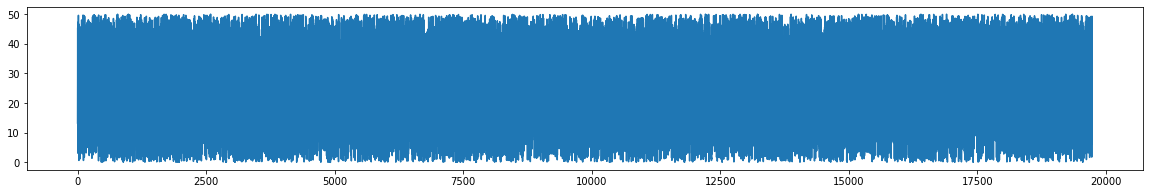

In [37]:
energy_con = timedata_np[:,27]
print(energy_con)
fig, ax = plt.subplots(figsize=(20, 3))
plt.plot(energy_con)
plt.show()

First week

In [39]:
print(timedata_np[42,0])
print(timedata_np[7*24*6+42,0])

1/12/2016 0:00
1/19/2016 0:00


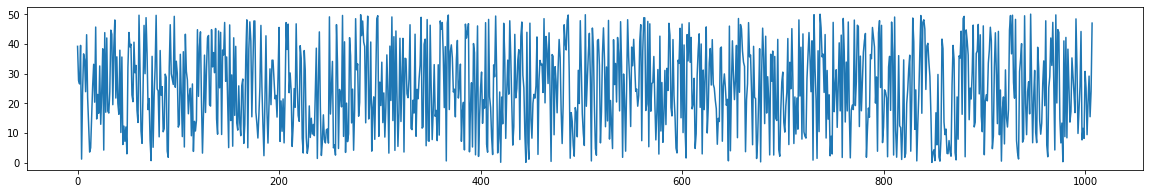

In [40]:
energy_con_1st_week = timedata_np[42:7*24*6+42,27]
energy_con_1st_week
fig, ax = plt.subplots(figsize=(20, 3))
plt.plot(energy_con_1st_week)
plt.show()

## 2.2.2

<Figure size 432x288 with 0 Axes>

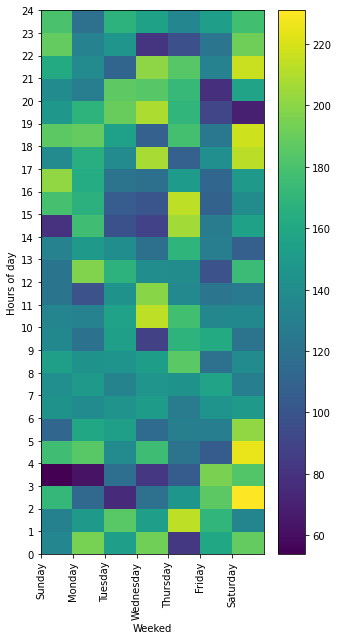

In [41]:
Date_1 = time_data["date"]

td = time_data.set_index(pd.DatetimeIndex(pd.to_datetime(Date_1)))

td_day = td.resample('H').sum()
td_day



fig = plt.figure()
Week_data = td_day.loc['2016-01-17 00:00:00' : '2016-01-23 23:50:00']



Week_data = Week_data['Energy Consumption']
Week_data = Week_data.reset_index()
Week_data['Energy Consumption']



Week_data = np.reshape(Week_data['Energy Consumption'].values, (24,7))

fig, ax = plt.subplots(figsize=(5, 10))
ax = plt.gca()
heatmap = plt.pcolor(Week_data)

ax.set_yticks(range(0,25))
ax.set_xticks(range(0,7))
plt.xticks(rotation=90)
ax.set_xticklabels(['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'])


ax.set_ylabel('Hours of day')
ax.set_xlabel('Weeked')

plt.colorbar(mappable = heatmap)

# 2.2.3

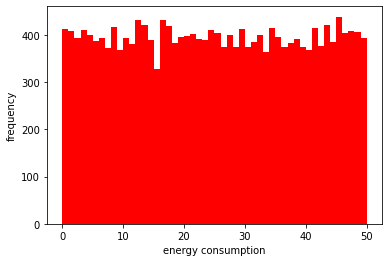

In [42]:
_ = plt.hist(time_data['Energy Consumption'],50,[0,50], color = 'r')
plt.xlabel('energy consumption')
plt.ylabel('frequency')
plt.show()

## 2.2.4

In [43]:
def create_NSM(date):
    time = date[-5:]
    NSM = int(time[-2:])*60 + int(time[-5:-3])*3600
    return NSM

time_data["NSM"] = time_data["date"].apply(lambda x: create_NSM(x))
time_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption,NSM
0,1/11/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,61200
1,1/11/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,61800
2,1/11/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,62400
3,1/11/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,63000
4,1/11/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,63600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,5/27/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,62400
19731,5/27/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,63000
19732,5/27/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,63600
19733,5/27/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,64200


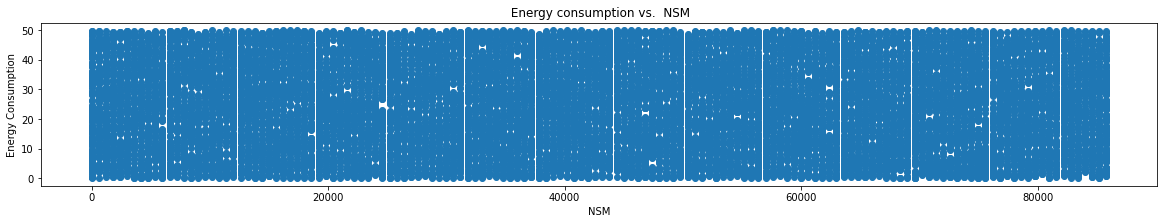

In [44]:
fig, ax = plt.subplots(figsize=(20, 3))
plt_appliances  = plt.plot(time_data['NSM'],time_data['Energy Consumption'],"o")
plt.ylabel('Energy Consumption')
plt.xlabel('NSM')
plt.title(" Energy consumption vs.  NSM")
plt.show()

## 2.2.4. One day result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 432x288 with 0 Axes>

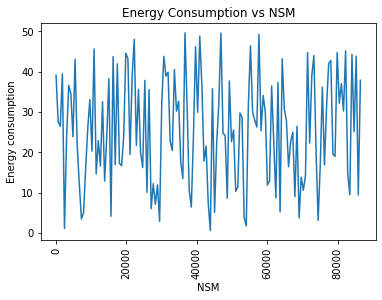

In [45]:
NSM =  24 * 3600 
NSM = list(range(0,NSM+1, 600))

Day_data = time_data[ 42: 187]

Day_data['NSM'] = NSM
Day_data

fig = plt.figure()
plt_NSM = Day_data.plot(x = 'NSM', y = 'Energy Consumption', rot = 90, title = 'Energy Consumption vs NSM', xlabel = 'NSM', ylabel = 'Energy consumption', legend=None)

plt.show()
#NSM= np.array()
#Day_data

## 2.2.5

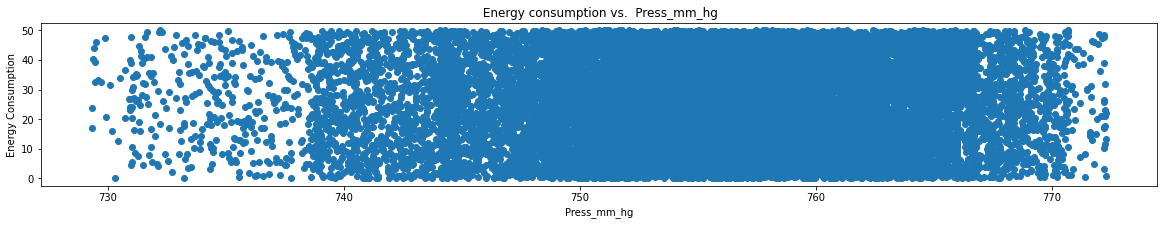

In [46]:
fig, ax = plt.subplots(figsize=(20, 3))
plt_appliances  = plt.plot(time_data['Press_mm_hg'],time_data['Energy Consumption'],"o")
plt.ylabel('Energy Consumption')
plt.xlabel('Press_mm_hg')
plt.title(" Energy consumption vs.  Press_mm_hg")
plt.show()

## 2.2.5. One week result

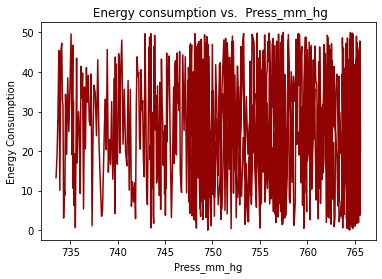

In [47]:
ata_airfoil =  time_data[0:1007]
fig = plt.figure()
plt_appliances  = plt.plot(ata_airfoil['Press_mm_hg'],ata_airfoil['Energy Consumption'] , label='raw_tmp', color = '#900302')
plt.ylabel('Energy Consumption')
plt.xlabel('Press_mm_hg')
plt.title(" Energy consumption vs.  Press_mm_hg")
plt.show()

## 2.2.6




We can observe from parts 2.2.4 and 2.2.5 that there is no obvious meaningful relationship between the levels of energy consumption and either of Press_mm_hg or NSM. This could be due to the presence of a confunding factor obscuring the effect of these terms on the energy consumption. This indeed merits more investigation into the dataset to properly categorzie it. From the heat map, however, we can observe that there is an overall increase in the energy consumption around noon and also around midnight.

# 2.3 multi variate

In [48]:
!ls

airfoil_self_noise.dat	energydata_complete.csv  sudoku-original.png
Assignment1.pdf		HW1_fotouhi.ipynb


In [49]:
df = pd.read_csv('airfoil_self_noise.dat', delimiter="\t", header= None)

In [50]:
df.columns = ["frequency", "angle of attack", "chord length", "velocity", "tickness", "pressure level"]
df

,frequency,angle of attack,chord length,velocity,tickness,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [51]:
df.mean()

frequency          2886.380572
angle of attack       6.782302
chord length          0.136548
velocity             50.860745
tickness              0.011140
pressure level      124.835943
dtype: float64

In [52]:
df.var()

frequency          9.938717e+06
angle of attack    3.502424e+01
chord length       8.749868e-03
velocity           2.425116e+02
tickness           1.729287e-04
pressure level     4.759146e+01
dtype: float64

In [53]:
df.median()

frequency          1600.000000
angle of attack       5.400000
chord length          0.101600
velocity             39.600000
tickness              0.004957
pressure level      125.721000
dtype: float64

In [54]:
df.kurtosis()

frequency          5.708685
angle of attack   -0.412951
chord length      -1.037964
velocity          -1.563951
tickness           2.218903
pressure level    -0.314187
dtype: float64

In [55]:
df.skew()

frequency          2.137084
angle of attack    0.689164
chord length       0.457457
velocity           0.235852
tickness           1.702165
pressure level    -0.418952
dtype: float64

In [56]:
range = df.max() - df.min()
range

frequency          19800.000000
angle of attack       22.200000
chord length           0.279400
velocity              39.600000
tickness               0.058011
pressure level        37.607000
dtype: float64